# Facilities

District-level information was obtained online, through the Ministry of Finance online "Fiscal Transfers" database <cite data-cite="otims_2018"><a href="https://github.com/alexgoodell/uganda-model/blob/master/refs/cite-md/otims_2018.md">(otims_2018)</a></cite>. Health facility information was obtained from the 2017 Health Facility Master List, which we found on the document-sharing website Scribd.com <cite data-cite="mohdhi2017"><a href="https://github.com/alexgoodell/uganda-model/blob/master/refs/cite-md/mohdhi2017.md">(mohdhi2017)</a></cite>. Data was extracted with the Tabula software <cite data-cite="tabula_2018"><a href="https://github.com/alexgoodell/uganda-model/blob/master/refs/cite-md/tabula_2018.md">(tabula_2018)</a></cite>.

### Master facility list pre-processing
After extraction, data from the master facility list were compared against summary tables from the same document to identify any missing data. Changes were needed in four districts:
1. The Health Facility Master List claimed that there were 32 operating health facilities in the __Amuru__ district, but did not list any. For this district, 26 facilities were identified from the budgeting office data <cite data-cite="otims_2016"><a href="https://github.com/alexgoodell/uganda-model/blob/master/refs/cite-md/otims_2016.md">(otims_2016)</a></cite>. An additional three facilities (for a total of 29) were identified from 2012 health infastructure data: ST. AUGUSTINE Health Center II, Otwee Health Center III, and Pabbo Health Centre III <cite data-cite="hid2012"><a href="https://github.com/alexgoodell/uganda-model/blob/master/refs/cite-md/hid2012.md">(hid2012)</a></cite>. There were assigned a sub-county NHPI of SC8ZISZD6 (Amuru town council, Amoyokoma Parish)
2. There were also no facilities listed for the __Kibaale__ district, though the document listed 16 facilities (7 of which are HCIII, 1 HC IV, 1 hospital) in a summary table (Table 8). This is a new district, created in July 2016, when the previous Kibaale District was split into Kagadi, Kakumiro and Kibaale. Eight facilities were identified in the budgeting data <cite data-cite="otims_2016"><a href="https://github.com/alexgoodell/uganda-model/blob/master/refs/cite-md/otims_2016.md">(otims_2016)</a></cite>, and two additional were identified with the infastructure data <cite data-cite="hid2012"><a href="https://github.com/alexgoodell/uganda-model/blob/master/refs/cite-md/hid2012.md">(hid2012)</a></cite>. This process thus identified a total of 5 HC III's, 1 HC IV, and 1 hospital. There were assigned a sub-country of SCLMS8IG1 (Kibaale town council, Ruguuza Parish).
3. The __Mityana__ district was missing its 24th facility, reporting 65 of 66 facilities. According to table 5, this district has a hospital. After reviewing the budgeting data, Mityana Hospital was identified and added to our database. It was assigned a random sub-county within Mityana: SC96Q5BX1 (Bulera Subcounty, Kakonde Parish)
4. Three facilites in the __Mukono__ district (68: Royal Family Clinic Clinic, 88:	Trinity Clinic Clinic, 91: Vine Medical centre Clinic) did not have a sub-county NHPI. These facilities were assigned a sub-county NHPI of SCTMPU7S6 (for the Mukono Municipality, Nantaburirwa Parish).

In [1]:
# Import dependencies
import sys, os
sys.path.append(os.path.join(os.path.dirname(''), '..'))
from lib.dependencies import *
from lib import stats_util as su
import config

In [2]:
# Let's start a dataframe with district information. 
# I've gotten most of this data from http://www.budget.go.ug/fiscal_transfers
# The following is the code that was used to create the file -- no longer in use, just grab the CSV

'''
# get the population data as skeleton - create dataframe
url = 'http://www.budget.go.ug/fiscal_transfers/variable/show_dataset/var/MjA3'
page = urllib2.urlopen(url).read()
soup = BeautifulSoup(page, "html5lib")
table = soup.select_one("table.dataset")
# headers = [th.text.encode("utf-8") for th in table.select("tr th")]
districts = pd.read_html(str(table))[0]
districts = districts.set_index('Vote code')

# urls for the remaining columns we want
urls = [ 
# hard to reach
'http://www.budget.go.ug/fiscal_transfers/variable/show_dataset/var/OTA3',
# pop per health fac    
'http://www.budget.go.ug/fiscal_transfers/variable/show_dataset/var/Mjc3',
# rural pop
'http://www.budget.go.ug/fiscal_transfers/variable/show_dataset/var/NjA3',
# public hospitals
'http://www.budget.go.ug/fiscal_transfers/variable/show_dataset/var/MDQ4',
# is district?
'http://www.budget.go.ug/fiscal_transfers/variable/show_dataset/var/MzU2',
# poverty headcount
'http://www.budget.go.ug/fiscal_transfers/variable/show_dataset/var/NDMy',
# is municiplality
'http://www.budget.go.ug/fiscal_transfers/variable/show_dataset/var/NDc2',
# distance from kampala (cities)
'http://www.budget.go.ug/fiscal_transfers/variable/show_dataset/var/Njc2',
# distance from kampala (districts)
'http://www.budget.go.ug/fiscal_transfers/variable/show_dataset/var/OTU2'
]

for url in urls:
    page = urllib2.urlopen(url).read()
    soup = BeautifulSoup(page, "html5lib")
    table = soup.select_one("table.dataset")
    nd = pd.read_html(str(table))[0]
    nd = nd.set_index('Vote code')
    districts = pd.concat([districts, nd], axis=1)

# Remove duplicated columns
districts = districts.loc[:,~districts.columns.duplicated()]

# Export
districts.to_csv("districts_20-March-2018.csv")

'''

districts = pd.read_csv(config.data_path + '/budget-office/districts_20-March-2018.csv')

rename = {
'Region': 'region_name',
'District': 'district_name',
# can't use abbv "pop" on its own bc protected var
'Population (2015/16)': 'population', 
'Hard to Reach, Hard to Stay (2015/16)': 'is_hard_to_reach',
'Population per health facility (2015/16)': 'pop_per_health_fac',
'Rural Population (2015/16)': 'rural_pop',
'Constant (Public or PNFP Hospitals) (2015/16)': 'public_hosp',
'Constant (District) (2015/16)': 'is_district', 
'Poverty Headcount (2015/16)': 'poverty_pop',
'Constant (Municipality) (2015/16)': 'is_city',
'Distance from Kampala (Municipality) (2015/16)': 'distance_from_kampala_city',
'Distance from Kampala (District) (2015/16)': 'distance_from_kampala_district' 
}

# Rename columns to more useful 
districts = districts.rename(columns=rename)

# Combined distance from kampala (different columns for same variable)
districts['distance_from_kampala'] = districts['distance_from_kampala_district'] + districts['distance_from_kampala_city'] 
districts = districts.drop(columns=['distance_from_kampala_district','distance_from_kampala_city'])

districts = su.clean_columns(districts)
districts = districts.set_index('vote_code')


districts.head(5).T

vote_code,573,501,611,588,564
region_name,Northern Region,Northern Region,Northern Region,Northern Region,Northern Region
district_name,Abim District,Adjumani District,Agago District,Alebtong District,Amolatar District
population,129400,239500,237900,242000,161600
is_hard_to_reach,1,1,1,0,0
pop_per_health_fac,6810.53,7044.12,5802.44,11000,12430.8
rural_pop,108700,195156,207338,234928,138027
public_hosp,1,1,1,0,0
is_district,2,2,2,2,2
poverty_pop,0.742,0.423,0.354,0.354,0.354
is_city,0,0,0,0,0


In [3]:
# Import the data from the mohdhi2017 facilities list - using excel because CSV caused 
# line-splitting problems (some cells have returns)
facilities = pd.read_excel(config.data_path + "/moh-div-health-info/facilities.xlsx", sheet_name="facilities", header=0)

# make splitter function
splitter = lambda x: pd.Series([i for i in reversed(x.split('/'))])

# split HSDT Code (see page 7 of mohdhi2017 for details of HSDT codes)
# note: after data cleaning, some facilities required manual setting of subcounty NHPI.
# This was accomplished by setting the facility HSDT code to SCXXXXXX/NA/NA, where X's = SC NHPI
facilities[['parish_level_fac_id', 'parish_nhpi', 'subcounty_nhpi']] = facilities['HSDT Code'].apply(splitter)

# drop uneeded columns
facilities = facilities.drop(columns={'District_name'})

# Load the subcounty list - used to link facilities to their district
subcounties = pd.read_csv(config.data_path + "/moh-div-health-info/subcounties.csv")
rename = {'NHPI Code': 'subcounty_nhpi', 'Name': 'subcounty_name', 
          'HSDT Code': 'subcounty_full_hsdt_code', 'County': 'county_name', 
          'District': 'district_name',
          'Subregion': 'subregion_name'}
subcounties = subcounties.rename(columns=rename)
subcounties = subcounties.drop(columns={'#'})
subcounties.subcounty_nhpi = subcounties.subcounty_nhpi.str.strip()

# Add the subcounty data to the facilites list
# This will allow us to link the facilites to their district
facilities = facilities.join(subcounties.set_index('subcounty_nhpi'), on="subcounty_nhpi", how="left")

# Fix the whitespace in the column names, replace strings with underscore
facilities = su.clean_columns(facilities)

facilities.head(2).T

,0,1
db_id,0,1
id_within_district,1,2
hsd,Labwor HSD,Labwor HSD
name,Abim General Hospital,Adea Health Centre II
level,Hospital,HC II
authority,MOH,MOH
ownership,Govt,Govt
nhpi_code,HFA6Q7GB2,HFZW8MEX9
hsdt_code,SCL79ULU0/PA95VLAL8/8001,SC5AFV6Y8/PALG8WW26/8001
source,mohdhi2017,mohdhi2017


In [4]:
# Add the district data from above to the facilities dataframe
facilities = facilities.join(districts.set_index('district_name'), 
                             on="district_name",
                             how="left")
facilities.head(1).T

,0
db_id,0
id_within_district,1
hsd,Labwor HSD
name,Abim General Hospital
level,Hospital
authority,MOH
ownership,Govt
nhpi_code,HFA6Q7GB2
hsdt_code,SCL79ULU0/PA95VLAL8/8001
source,mohdhi2017


In [5]:
# Lets look at some general stats

su.tab(facilities, ['ownership', 'authority', 'level'])
pd.unique(facilities.authority)



Ownership
| Name   |   Count |
|:-------|--------:|
| Govt   |    3084 |
| PFP    |    2365 |
| PNFP   |     945 |


Authority
| Name       |   Count |
|:-----------|--------:|
| MOH        |    2921 |
| Private    |    2365 |
| NGO        |     349 |
| CBO        |     213 |
| UEC (UCMB) |     183 |
| UPMB       |      92 |
| UPS        |      64 |
| UPF        |      53 |
| UMMB       |      32 |
| UPDF       |      30 |
| UEC        |      18 |
| (UCMB)     |         |
| SDA        |      17 |
| UBTS       |      14 |
| TASO       |      12 |
| AIC        |       9 |
| CAFU       |       7 |
| Orthodox   |       6 |
| Other NGO  |       2 |
| UCMB       |       2 |
| UNHCR      |       2 |
| SOS        |       2 |
| UEC        |       1 |


Level
| Name     |   Count |
|:---------|--------:|
| HC II    |    4200 |
| HC III   |    1508 |
| Clinic   |     258 |
| HC IV    |     215 |
| Hospital |     146 |
| SC       |      26 |
| RRH      |      16 |
| RBB      |       7 |
| BCDP  

array([u'MOH', u'UPMB', u'UEC (UCMB)', u'UPDF', u'UPF', u'UPS',
       u'Private', u'UNHCR', u'NGO', u'CBO', u'AIC', u'UEC\n(UCMB)',
       u'UBTS', u'UMMB', u'SDA', u'Orthodox', u'TASO', u'CAFU', u'UEC',
       u'SOS', u'Other NGO', u'UCMB'], dtype=object)

In [6]:
# Clean up duplicates
reload(su)
rename = [{'old_names': ['UEC (UCMB)', 'UEC', 'UEC\n(UCMB)', 'UCMB'],
           'new_name': 'Catholic', 
           'col': 'authority' },
          # UPMB = army, UPF = police , UPS = prison service
           {'old_names': ['UPDF', 'UPF', 'UPS'],
           'new_name': 'Other govt', 
           'col': 'authority' },
          # SDA = adventists
           {'old_names': ['SDA'],
           'new_name': 'Adventist', 
           'col': 'authority' },
          # TASO = The AIDS Support Organization, AIC = aids information center
           {'old_names': ['Other NGO', 'TASO', 'AIC'],
           'new_name': 'NGO', 
           'col': 'authority' },          
          # UTBS = Uganda Blood Transfusion Services (MOH)
            {'old_names': ['UBTS'],
           'new_name': 'MOH', 
           'col': 'authority' }, 
          # UPMB = protestant
            { 'old_names': ['UPMB'],
           'new_name': 'Protestant', 
           'col': 'authority' }, 
          # UMMB = muslim 
         {'old_names': ['UMMB'],
           'new_name': 'Muslim', 
           'col': 'authority' }, 
           # Other
         {'old_names': ['CAFU', 'Orthodox', 'SOS', 'UNHCR'],
           'new_name': 'Other', 
           'col': 'authority' },
         
           # Blood banks
         {'old_names': ['RBB', 'NBB'],
           'new_name': 'Blood bank', 
           'col': 'level' },         
         # BCDP - british council for disabled people?
         {'old_names': ['BCDP'],
           'new_name': 'Other', 
           'col': 'level' },         
        # Specialty clinic - (most of them are AIDS clinics)
         {'old_names': ['SC'],
           'new_name': 'Specialty clinic', 
           'col': 'level' },
          
        # Regional ref
         {'old_names': ['RRH'],
           'new_name': 'Regional referral hospital', 
           'col': 'level' }, 
          
        # National ref
         {'old_names': ['NRH'],
           'new_name': 'National referral hospital', 
           'col': 'level' } 
          
          
         ]         

su.rename_vals(facilities, rename)

print "\n\n ownership \n", su.pt(pd.crosstab(facilities.ownership, columns="count"))
print "\n\n authority \n", su.pt(pd.crosstab(facilities.authority, columns="count"))
print "\n\n level \n", su.pt(pd.crosstab(facilities.level, columns="count"))



 ownership 
|      |   count |
|:-----|--------:|
| Govt |    3084 |
| PFP  |    2365 |
| PNFP |     945 |


 authority 
|            |   count |
|:-----------|--------:|
| Adventist  |      17 |
| CBO        |     213 |
| Catholic   |     204 |
| MOH        |    2935 |
| Muslim     |      32 |
| NGO        |     372 |
| Other      |      17 |
| Other govt |     147 |
| Private    |    2365 |
| Protestant |      92 |


 level 
|                            |   count |
|:---------------------------|--------:|
| Blood bank                 |       8 |
| Clinic                     |     258 |
| HC II                      |    4200 |
| HC III                     |    1508 |
| HC IV                      |     215 |
| Hospital                   |     146 |
| National referral hospital |       2 |
| Other                      |       6 |
| Regional referral hospital |      16 |
| Specialty clinic           |      26 |


In [7]:
print su.pt(pd.crosstab(facilities.ownership, [facilities.level]).T)

|                            |   Govt |   PFP |   PNFP |
|:---------------------------|-------:|------:|-------:|
| Blood bank                 |      8 |     0 |      0 |
| Clinic                     |      0 |   244 |     14 |
| HC II                      |   1832 |  1850 |    518 |
| HC III                     |    992 |   216 |    300 |
| HC IV                      |    175 |    19 |     21 |
| Hospital                   |     51 |    35 |     60 |
| National referral hospital |      2 |     0 |      0 |
| Other                      |      6 |     0 |      0 |
| Regional referral hospital |     16 |     0 |      0 |
| Specialty clinic           |      0 |     0 |     26 |


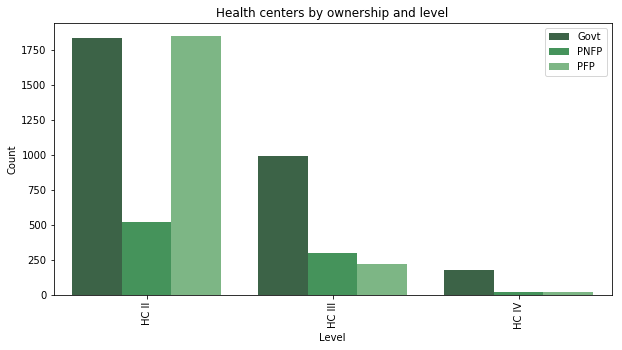

In [8]:
%matplotlib inline
hc = ['HC III', 'HC IV', 'HC II']
hosp = ['Hospital','Regional referral hospital', 'National referral hospital']

plt.figure(figsize=(10, 5))
sns.countplot(x='level', 
              hue='ownership', 
              data=facilities[facilities.level.isin(hc)], palette="Greens_d")
_ = plt.xlabel("Level")
_ = plt.xticks(rotation=90)
_ = plt.ylabel("Count")
_ = plt.title("Health centers by ownership and level")
_ = plt.legend()


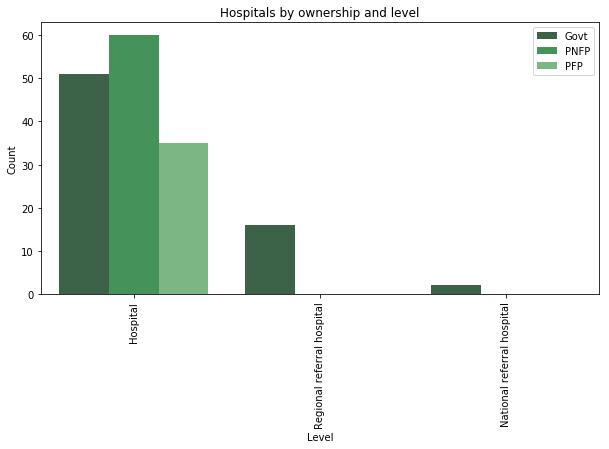

In [9]:
plt.figure(figsize=(10, 5))
sns.countplot(x='level', 
              hue='ownership', 
              data=facilities[facilities.level.isin(hosp)], palette="Greens_d")
_ = plt.xlabel("Level")
_ = plt.xticks(rotation=90)
_ = plt.ylabel("Count")
_ = plt.title("Hospitals by ownership and level")
_ = plt.legend()

In [10]:
# Facilities by hard-to-reach-hard-to-stay - absolute
reload(su)
print su.pt(
    pd.crosstab(
        facilities.is_hard_to_reach,
        [facilities.level]).T, 
    ["Not HTR", "HTR"], 
    "Facilities by hard-to-reach, abs.")

        Facilities by hard-to-reach, abs.         

|                            |   Not HTR |   HTR |
|:---------------------------|----------:|------:|
| Blood bank                 |         6 |     1 |
| Clinic                     |       199 |    58 |
| HC II                      |      2245 |   543 |
| HC III                     |      1237 |   208 |
| HC IV                      |       169 |    32 |
| Hospital                   |       105 |    19 |
| Other                      |         6 |     0 |
| Regional referral hospital |        11 |     2 |
| Specialty clinic           |        19 |     2 |


In [18]:
# Facilities by hard-to-reach-hard-to-stay - per capita

# get population sizes
htr_pop = districts[districts.is_hard_to_reach == 1].population.sum()
non_htr_pop = districts[districts.is_hard_to_reach == 0].population.sum()

# make a 1-by-2 matrix; divide by 100,000 for per-100k
y = [[htr_pop/100000.0],[non_htr_pop/100000.0]]

# matrix division
x = np.divide(pd.crosstab(
    facilities.is_hard_to_reach, 
    [facilities.level]), 
    y)


print su.pt(x.T, ["Not HTR", "HTR"], "Facilities by hard-to-reach per 100k pop")


       Facilities by hard-to-reach per 100k pop        

|                            |   Not HTR |        HTR |
|:---------------------------|----------:|-----------:|
| Blood bank                 |  0.112566 | 0.00322913 |
| Clinic                     |  3.73345  | 0.187289   |
| HC II                      | 42.1185   | 1.75342    |
| HC III                     | 23.2074   | 0.671659   |
| HC IV                      |  3.17061  | 0.103332   |
| Hospital                   |  1.96991  | 0.0613535  |
| Other                      |  0.112566 | 0          |
| Regional referral hospital |  0.206371 | 0.00645826 |
| Specialty clinic           |  0.35646  | 0.00645826 |
